# Take-Home Exam #2
**FIZ228 - Numerical Analysis**  
Dr. Emre S. Tasci, Hacettepe University

_It is strictly forbidden to contact anybody outside your group or seeking the direct answer on the internet. Every member of the group is responsible for every one of the questions._

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 0) Better than average

Can you come up with a set of data that has a representative that is better than their average?

## 1) Six-Hump Camel Function

The "Six-Hump Camel" function is a two-dimensional function used in testing optimizer algorithms and it's defined as:

$$f(\vec x) = (4 - 2.1 x_1^2 +\frac{x_1^4}{3}) x_1^2 + x_1 x_2 + (-4 + 4 x_2^2) x_2^2 $$

In [2]:
def sixHump(x):
    # Taken from the "Virtual Library of Simulation Experiments"
    # by Sonja Surjanovic & Derek Bingham
    # http://www.sfu.ca/~ssurjano/index.html
    # Original reference: 
    # Molga, M., & Smutnicki, C. Test functions for optimization needs (2005) 
    # from http://www.zsd.ict.pwr.wroc.pl/files/docs/functions.pdf.
    # also https://robertmarks.org/Classes/ENGR5358/Papers/functions.pdf
    return (4-2.1*x[0]**2+x[0]**4/3)*x[0]**2 \
            + x[0]*x[1] \
            + (-4+4*x[1]**2)*x[1]**2

Six-Hump Camel function has two global minimums of -1.0316 located at $(x_1,x_2) = (0.0898,-0.7126)$ and $(x_1,x_2) = (-0.0898,0.7126)$.

In [3]:
sixHump([0.0898,-0.7126]), sixHump([-0.0898,0.7126])

(-1.0316284229280819, -1.0316284229280819)

and here is what it looks like:

In [4]:
def plotfun(f,xy=[]):
    # Basic contour plotter
    # EST 2023
    
    plt.figure(figsize = (12,10))
    levels = np.arange(-2,1,0.1)
    x = np.arange(-2.2,2.2,0.01)
    y = np.arange(-1.25,1.25,0.01)

    X,Y = np.meshgrid(x,y)
    Z = f([X,Y])
    lo1 = plt.contourf(X, Y, Z, cmap = plt.cm.viridis,levels=levels)
    plt.grid(False)
    plt.rcParams['axes.grid'] = False
    plt.colorbar()

    lo2 = plt.contour(X, Y, Z, colors='k',levels=levels)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.clabel(lo2, inline=True, fontsize=10)
    
    if(len(xy)>1):
        for xyi in xy:
            plt.plot(xyi[0],xyi[1],"*r",markersize=10)
    elif(len(xy)==1):
        plt.plot(xy[0][0],xy[0][1],"Xr",markersize=15)
    
    plt.show() 

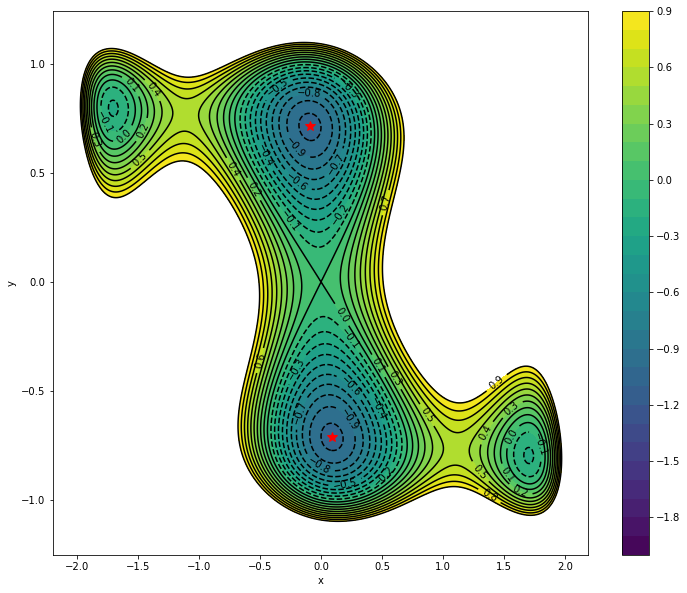

In [5]:
plotfun(sixHump,[[0.0898,-0.7126],[-0.0898,0.7126]])

Using scipy.optimize.minimize and using different starting points, obtain these two global minimum and local minimum points, as well. You are given the fact that all the minimum points are located in the interval:

$$-2.2\le x \le 2.2,\,-1.25\le y \le 1.25$$

**Bonus:**

Find the location and the value of the maximum in the interval:

$$-2.2\le x \le 2.2,\,-1.25\le y \le 1.25$$

### Misc.

You can also observe the 3D mesh version of the function's plot alas due to jupyter's limitations, you won't be able to interact (e.g., rotate, zoom, etc.) with it directly. For that purpose, you can save the following script as a python (sixhump3D.py) file and run it directly using the Python interpretator (`python sixhump3D.py`)

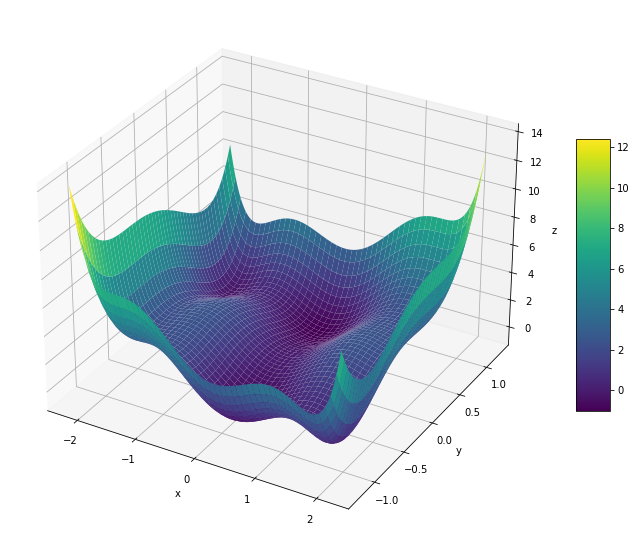

In [6]:
# Save this cell content as "sixhump3D.py"
import matplotlib.pyplot as plt
import numpy as np

def sixHump(x):
    # Taken from the "Virtual Library of Simulation Experiments"
    # by Sonja Surjanovic & Derek Bingham
    # http://www.sfu.ca/~ssurjano/index.html
    # Original reference: 
    # Molga, M., & Smutnicki, C. Test functions for optimization needs (2005) 
    # from http://www.zsd.ict.pwr.wroc.pl/files/docs/functions.pdf.
    # also https://robertmarks.org/Classes/ENGR5358/Papers/functions.pdf
    return (4-2.1*x[0]**2+x[0]**4/3)*x[0]**2 \
            + x[0]*x[1] \
            + (-4+4*x[1]**2)*x[1]**2

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')


x = np.arange(-2.2,2.2,0.01)
y = np.arange(-1.25,1.25,0.01)
X,Y = np.meshgrid(x,y)

Z = sixHump([X,Y])

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.viridis)

# Set axes label
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

## 2) Least-Squares Fitting: Linear

Fit the following data to the linear function given as $f(x) = ax + b$ by finding the most optimal values for $a$ and $b$.

In [7]:
import pandas as pd

In [8]:
data_lin = pd.DataFrame({'x':np.arange(0,101,10),'y':np.array([ 26.94786969,   
                                                                 9.28357035,
                                                               114.31762497,
                                                               126.40005481,
                                                               242.93370981,
                                                               288.1189529,
                                                               313.52317194,
                                                               326.48321876,
                                                               417.02592236,
                                                               477.34821011,
                                                               521.75068562])})
data_lin

,x,y
0,0,26.947870
1,10,9.283570
2,20,114.317625
3,30,126.400055
4,40,242.933710
5,50,288.118953
6,60,313.523172
7,70,326.483219
8,80,417.025922
9,90,477.348210


Do the fitting via: $\DeclareMathOperator\erf{erf}$  

* a. Application of the least-squares fitting formula directly,  
  
   $$a = \frac{n\sum{x_i y_i} - \sum{x_i}\sum{y_i}}{n\sum{x_i^2}-\left(\sum{x_i}\right)^2},\\\\b = \bar{y} - a\bar{x}$$  

* b. Defining and minimizing the following error/cost functions: 
    * $\erf_1(a,b) = \sum_{i}{(y_i - t_i)^2}$
    * $\erf_2(a,b) = \sqrt{\sum_{i}{(y_i - t_i)^2}}$
    * $\erf_3(a,b) = \sum_{i}{|y_i - t_i|}$

* c. Compare the errors of each fit using $\erf(a,b) = \sqrt{\frac{\sum_{i}{(y_i - t_i)^2}}{n}}$ (Root Mean Square -- RMS) function where $n$ is the total number of data.

${y_i}$ represent the given y values and ${t_i}$ represent the values obtained from the model fit.

## Bonus: Least Squares Fitting: Non-Linear (Gaussian)

Gauss function is defined as:

$$ G(x;a,b,c) = a \exp{\left(-\frac{(x-b)^2}{2c^2}\right)}$$

Fit the "04_DistortedGaussian.csv" data (where the 1st column holds the x values and the 2nd column the y values), into a Gaussian (using `scipy.optimize.minimize` to minimize the error), thereby identifying the best values for $(a,b,c)$. Calculate the coefficient of determination ($r^2$).